/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 168, 100)       │        41,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 168, 100)       │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 168, 100)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 168, 100)       │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 168, 100)       │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 168, 100)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 50)             │           200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 24)             │         1,224 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 154,424 (603.22 KB)

 Trainable params: 153,924 (601.27 KB)

 Non-trainable params: 500 (1.95 KB)

Epoch 1/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 39s 172ms/step - loss: 0.6292 - val_loss: 0.0803
Epoch 2/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 35s 163ms/step - loss: 0.1883 - val_loss: 0.0659
Epoch 3/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 35s 163ms/step - loss: 0.1279 - val_loss: 0.0584
Epoch 4/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 36s 165ms/step - loss: 0.0939 - val_loss: 0.0451
Epoch 5/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 36s 165ms/step - loss: 0.0656 - val_loss: 0.0253
Epoch 6/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 35s 162ms/step - loss: 0.0469 - val_loss: 0.0158
Epoch 7/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 37s 170ms/step - loss: 0.0339 - val_loss: 0.0108
Epoch 8/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 36s 168ms/step - loss: 0.0272 - val_loss: 0.0086
Epoch 9/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 36s 166ms/step - loss: 0.0230 - val_loss: 0.0076
Epoch 10/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 36s 168ms/step - loss: 0.0208 - val_loss: 0.0070
Epoch 11/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 36s 165ms/step - loss: 0.0192 - val_loss: 0.0061
Epoch 12/25
215/215

/var/folders/dh/j5bmpt9d6clgh4sxgj75h9zh0000gn/T/ipykernel_36418/2268486906.py:113: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  forecast_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(hours=1),


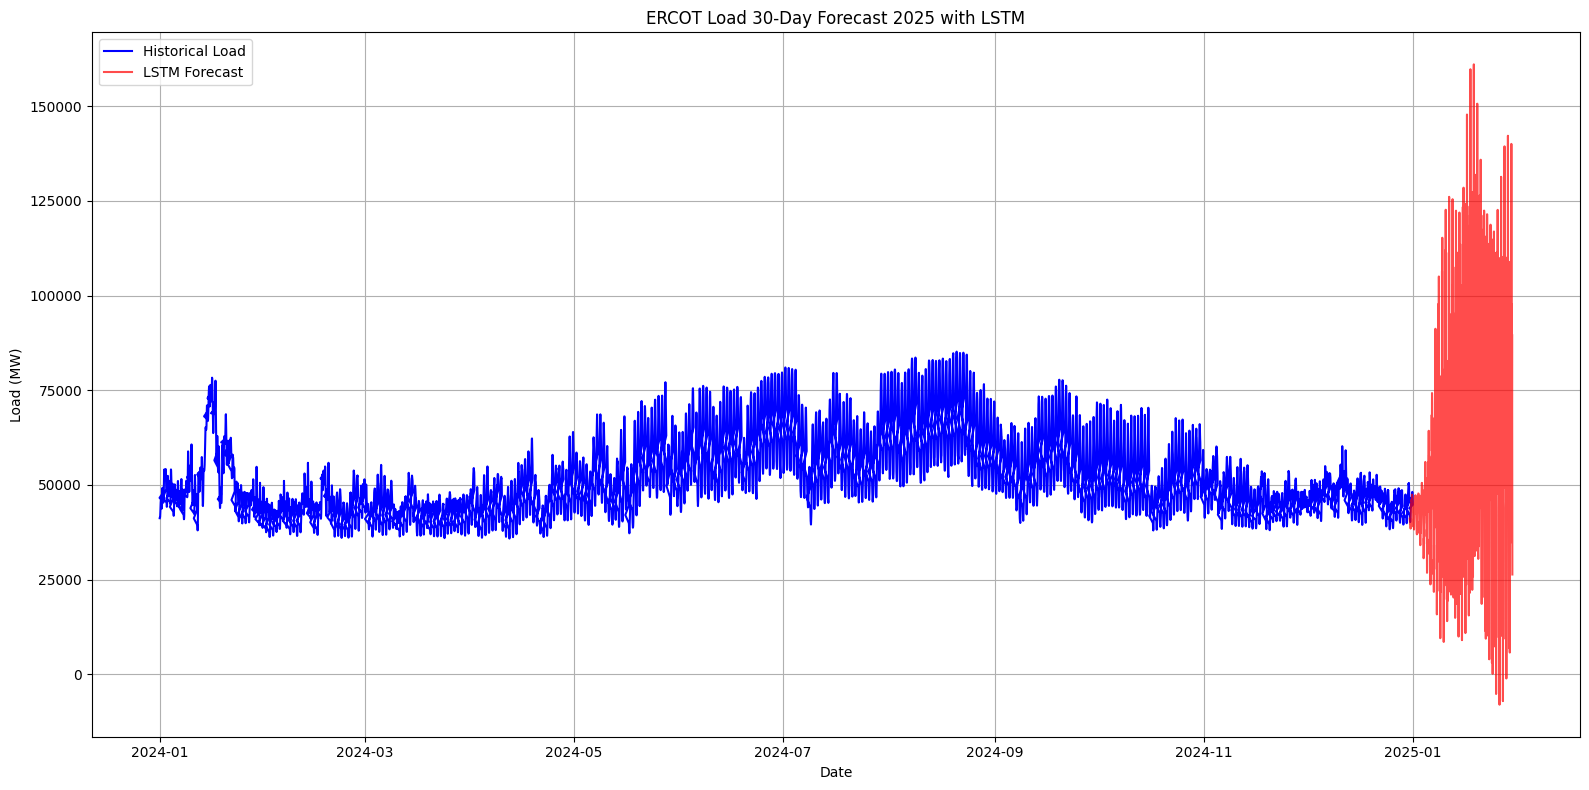

Mean Absolute Error: 23921.57 MW
Mean Squared Error: 1044949995.10 MW^2
R^2 Score: -73.76


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import os


path = os.getcwd()
# Load and preprocess data
df = pd.read_excel(path + "/Native_Load_2024.xlsx")

# Drop na rows
df.dropna(inplace=True)

# Clean and convert datetime
df['Hour Ending'] = (df['Hour Ending']
                    .str.replace(' 24:00', ' 00:00')
                    .str.replace(' DST', ''))
df['Hour Ending'] = pd.to_datetime(df['Hour Ending'], format='%m/%d/%Y %H:%M')
df.set_index('Hour Ending', inplace=True)
load_series = df['ERCOT'].astype(float)

# Feature engineering
df['hour'] = df.index.hour
df['dayofweek'] = df.index.dayofweek
df['dayofyear'] = df.index.dayofyear

# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['ERCOT', 'hour', 'dayofweek']])

# Create sequences with 168-hour (7-day) lookback and 24-hour forecast
def create_sequences(data, lookback, forecast_horizon):
    X, y = [], []
    for i in range(len(data)-lookback-forecast_horizon):
        X.append(data[i:(i+lookback)])
        y.append(data[(i+lookback):(i+lookback+forecast_horizon), 0])
    return np.array(X), np.array(y)

LOOKBACK = 168  # 7 days of hourly data
FORECAST = 24   # Predict next 24 hours
X, y = create_sequences(scaled_data, LOOKBACK, FORECAST)

# Split dataset
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build LSTM model
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(LOOKBACK, X.shape[2])))
model.add(BatchNormalization()) # Add Batch Normalization to stabilize training
model.add(Dropout(0.2))
model.add(LSTM(100, return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(BatchNormalization())
model.add(Dense(FORECAST))
optimizer = Adam(learning_rate=0.0001)

model.compile(optimizer=optimizer, loss='mse') # Adjust learning rate to 0.0001

# Removed the line that clips the learning rate as it is not needed

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True) # Add early stopping to prevent overfitting

model.summary()

# Train model
history = model.fit(X_train, y_train, 
                   epochs=25, 
                   batch_size=32,
                   validation_data=(X_test, y_test),
                   verbose=1)

# Recursive multi-step forecasting
def forecast_future(model, last_sequence, future_steps):
    forecasts = []
    current_sequence = last_sequence.copy()
    
    for _ in range(future_steps // FORECAST + 1):
        # Predict next FORECAST hours
        pred = model.predict(current_sequence.reshape(1, LOOKBACK, -1))[0]
        forecasts.extend(pred)
        
        # Update sequence with prediction
        new_entry = np.zeros((1, X.shape[2]))
        new_entry[0,0] = pred[0]  # Only update ERCOT value
        new_entry[0,1] = (current_sequence[-1,1] + 1) % 24  # Update hour
        new_entry[0,2] = (current_sequence[-1,2] + (1/24)) % 7  # Update dayofweek
        
        current_sequence = np.vstack([current_sequence[1:], new_entry])
    
    return forecasts[:future_steps]

# 30 day forecast
last_known = scaled_data[-LOOKBACK:]
forecast_steps = 24 * 30 # 30 days
forecast = forecast_future(model, last_known, forecast_steps)

# Inverse transform predictions
forecast_array = np.zeros((len(forecast), scaled_data.shape[1]))
forecast_array[:,0] = forecast
forecast_ercot = scaler.inverse_transform(forecast_array)[:,0]

# Create date range for forecast
forecast_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(hours=1),
                              periods=len(forecast_ercot),
                              freq='H')

# Plot results
plt.figure(figsize=(16,8))
plt.plot(df.index, df['ERCOT'], label='Historical Load', color='blue')
plt.plot(forecast_dates, forecast_ercot, label='LSTM Forecast', color='red', alpha=0.7)
plt.title('ERCOT Load 30-Day Forecast 2025 with LSTM')
plt.xlabel('Date')
plt.ylabel('Load (MW)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [6]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Truncate df2['ERCOT'] to match the length of forecast_ercot
df2_truncated = df2['ERCOT'][:len(forecast_ercot)]

# Calculate MSE
mse = mean_squared_error(df2_truncated, forecast_ercot)
print(f"Mean Squared Error: {mse:.2f} MW^2")

# Calculate MAE
mae = mean_absolute_error(df2_truncated, forecast_ercot)
print(f"Mean Absolute Error: {mae:.2f} MW")

# Calculate R^2 Score
r2 = r2_score(df2_truncated, forecast_ercot)
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error: 864869326.92 MW^2
Mean Absolute Error: 21795.75 MW
R^2 Score: -12.11


In [2]:
path = os.getcwd()
# Load and preprocess data
df2 = pd.read_excel(path + "/Native_Load_2025.xlsx")

# Drop na rows
df2.dropna(inplace=True)

# Clean and convert datetime
df2['Hour Ending'] = (df2['Hour Ending']
                    .str.replace(' 24:00', ' 00:00')
                    .str.replace(' DST', ''))
df2['Hour Ending'] = pd.to_datetime(df2['Hour Ending'], format='%m/%d/%Y %H:%M')
df2.set_index('Hour Ending', inplace=True)
load_series = df2['ERCOT'].astype(float)

# Feature engineering
df2['hour'] = df2.index.hour
df2['dayofweek'] = df2.index.dayofweek
df2['dayofyear'] = df2.index.dayofyear

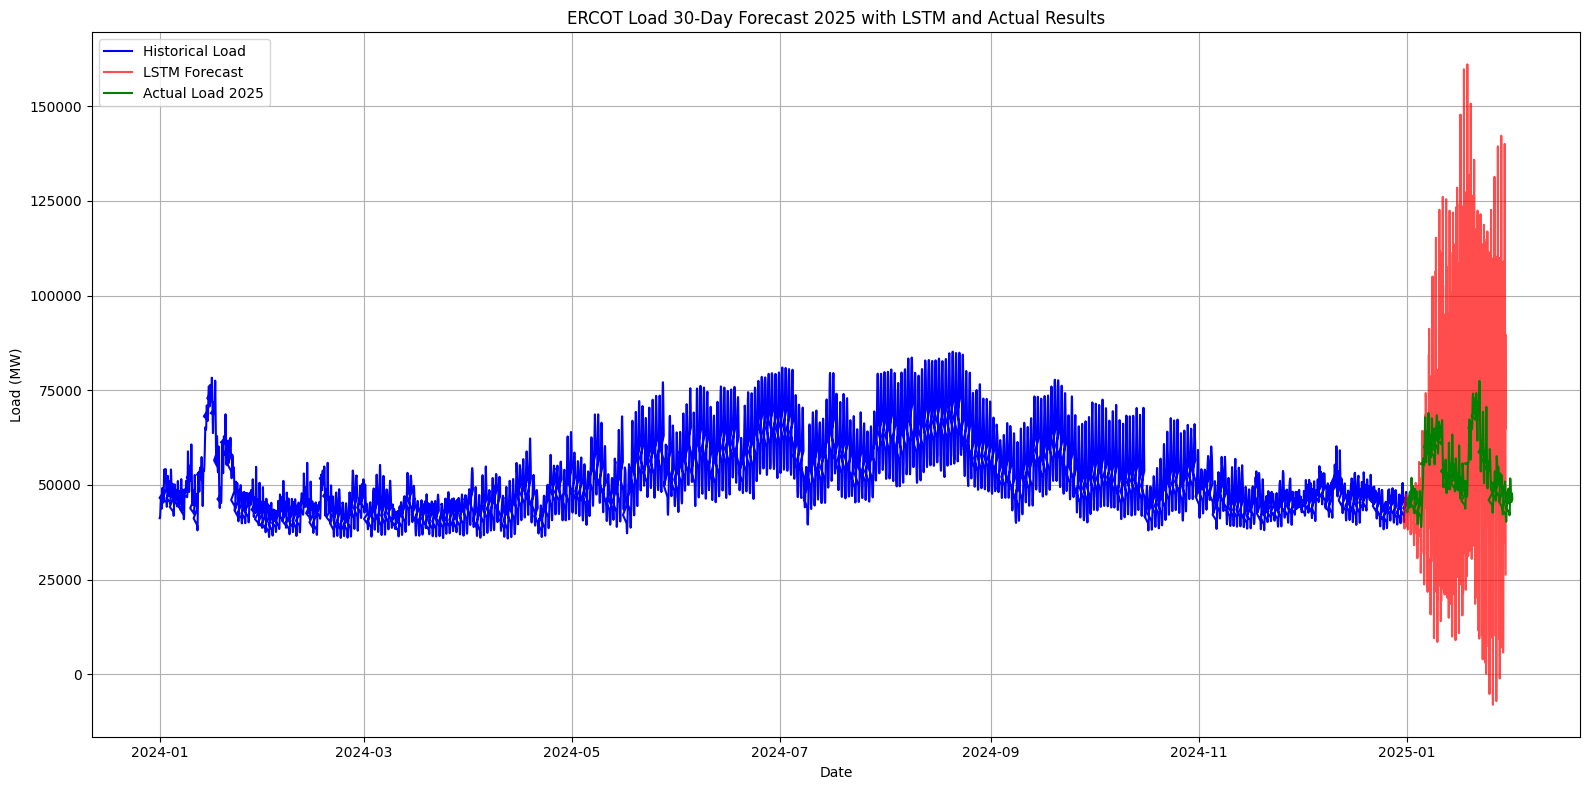

In [3]:
# Plot results
plt.figure(figsize=(16,8))
plt.plot(df.index, df['ERCOT'], label='Historical Load', color='blue')
plt.plot(forecast_dates, forecast_ercot, label='LSTM Forecast', color='red', alpha=0.7)
plt.plot(df2.index, df2['ERCOT'], label='Actual Load 2025', color='green')
plt.title('ERCOT Load 30-Day Forecast 2025 with LSTM and Actual Results')
plt.xlabel('Date')
plt.ylabel('Load (MW)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [4]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import numpy as np

# Calculate confidence intervals (assuming a fixed percentage for simplicity)
confidence_interval = 0.1  # 10% confidence interval
forecast_upper = forecast_ercot * (1 + confidence_interval)
forecast_lower = forecast_ercot * (1 - confidence_interval)

# Create subplots
fig = make_subplots(rows=1, cols=1)

# Add historical load trace
fig.add_trace(go.Scatter(x=df.index, y=df['ERCOT'], mode='lines', name='Historical Load', line=dict(color='blue')), row=1, col=1)

# Add forecast trace
fig.add_trace(go.Scatter(x=forecast_dates, y=forecast_ercot, mode='lines', name='LSTM Forecast', line=dict(color='red', dash='dash')), row=1, col=1)

# Add confidence interval
fig.add_trace(go.Scatter(x=np.concatenate([forecast_dates, forecast_dates[::-1]]),
                         y=np.concatenate([forecast_upper, forecast_lower[::-1]]),
                         fill='toself',
                         fillcolor='rgba(255, 0, 0, 0.2)',
                         line=dict(color='rgba(255, 255, 255, 0)'),
                         hoverinfo="skip",
                         showlegend=False), row=1, col=1)

# Add actual results trace from df2
fig.add_trace(go.Scatter(x=df2.index, y=df2['ERCOT'], mode='lines', name='Actual Load 2025', line=dict(color='green')), row=1, col=1)

# Update layout
fig.update_layout(title='ERCOT Load 30-Day Forecast 2025 with LSTM and Actual Results',
                  xaxis_title='Date',
                  yaxis_title='Load (MW)',
                  legend=dict(x=0, y=1),
                  template='plotly_white')

# Show plot
fig.show()

# Save plot as HTML
fig.write_html("ercot_load_forecast_with_actual_results.html")

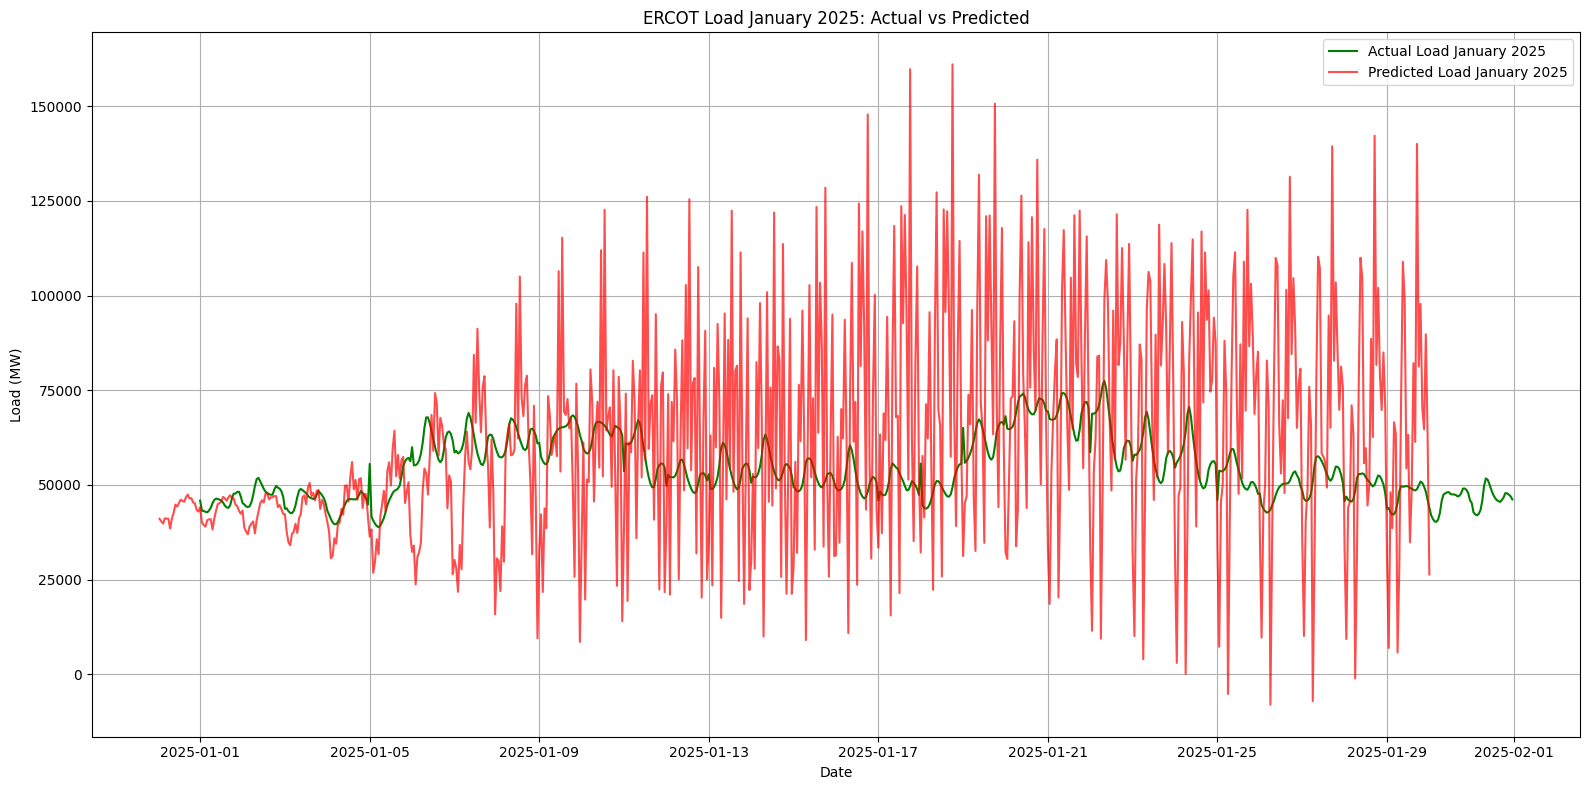

In [8]:
# Sort the index of df2
df2.sort_index(inplace=True)

# Filter the actual and forecast data for January 2025
actual_january = df2['ERCOT']['2025-01-01':'2025-01-31']
forecast_january = forecast_ercot[:len(actual_january)]

# Create a date range for the forecast data
forecast_dates_january = forecast_dates[:len(actual_january)]

# Plot results
plt.figure(figsize=(16,8))
plt.plot(actual_january.index, actual_january, label='Actual Load January 2025', color='green')
plt.plot(forecast_dates_january, forecast_january, label='Predicted Load January 2025', color='red', alpha=0.7)
plt.title('ERCOT Load January 2025: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Load (MW)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

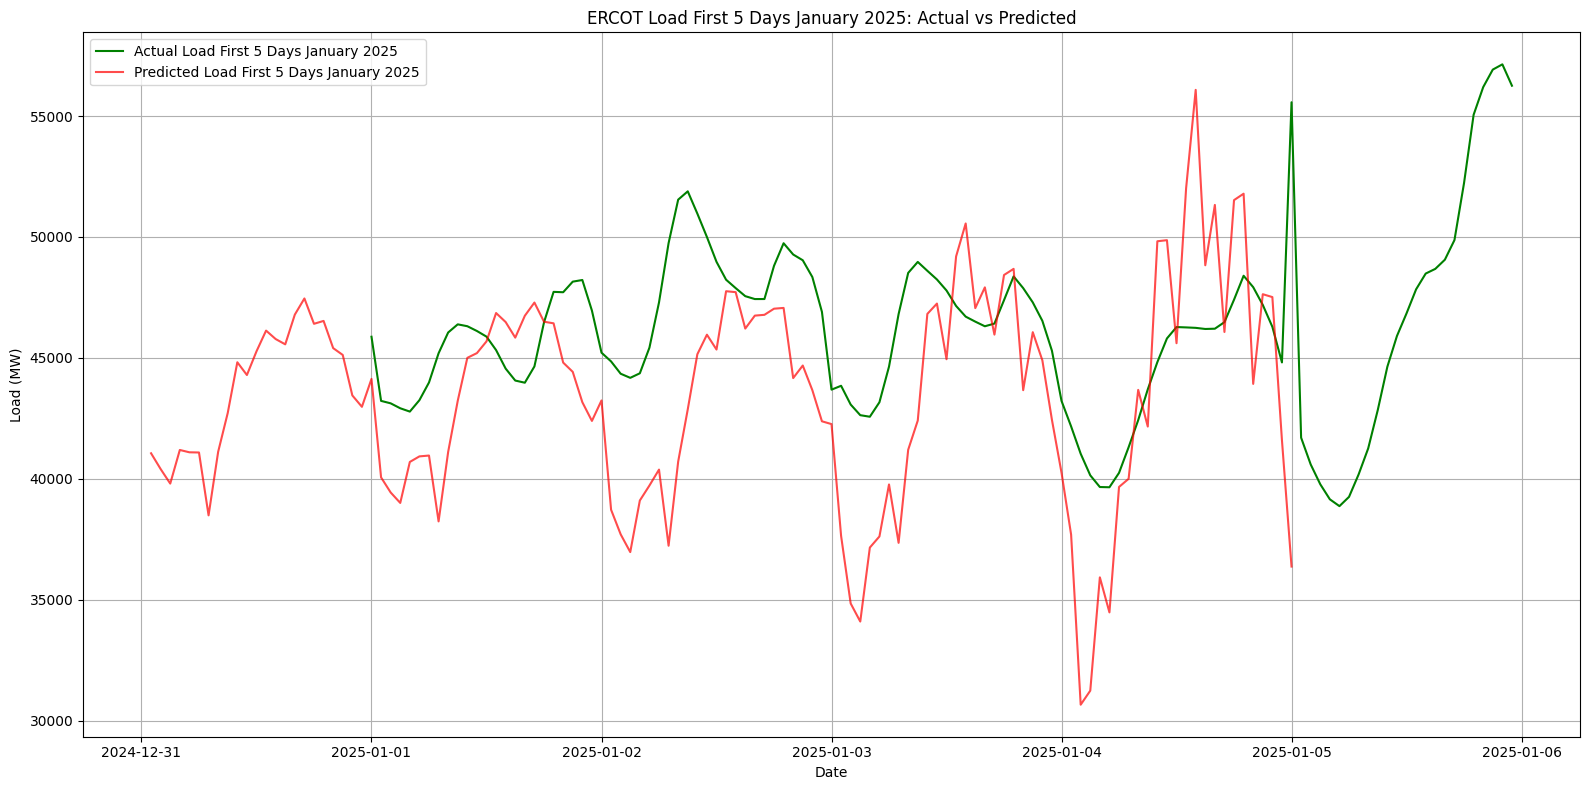

In [9]:
# Filter the actual and forecast data for the first 5 days of January 2025
actual_first_5_days = df2['ERCOT']['2025-01-01':'2025-01-05']
forecast_first_5_days = forecast_ercot[:len(actual_first_5_days)]

# Create a date range for the forecast data
forecast_dates_first_5_days = forecast_dates[:len(actual_first_5_days)]

# Plot results
plt.figure(figsize=(16,8))
plt.plot(actual_first_5_days.index, actual_first_5_days, label='Actual Load First 5 Days January 2025', color='green')
plt.plot(forecast_dates_first_5_days, forecast_first_5_days, label='Predicted Load First 5 Days January 2025', color='red', alpha=0.7)
plt.title('ERCOT Load First 5 Days January 2025: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Load (MW)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Mean Squared Error (MSE): 26084263.258171838
Mean Absolute Error (MAE): 3824.4762711696117
R² Score: -0.9198860856827087


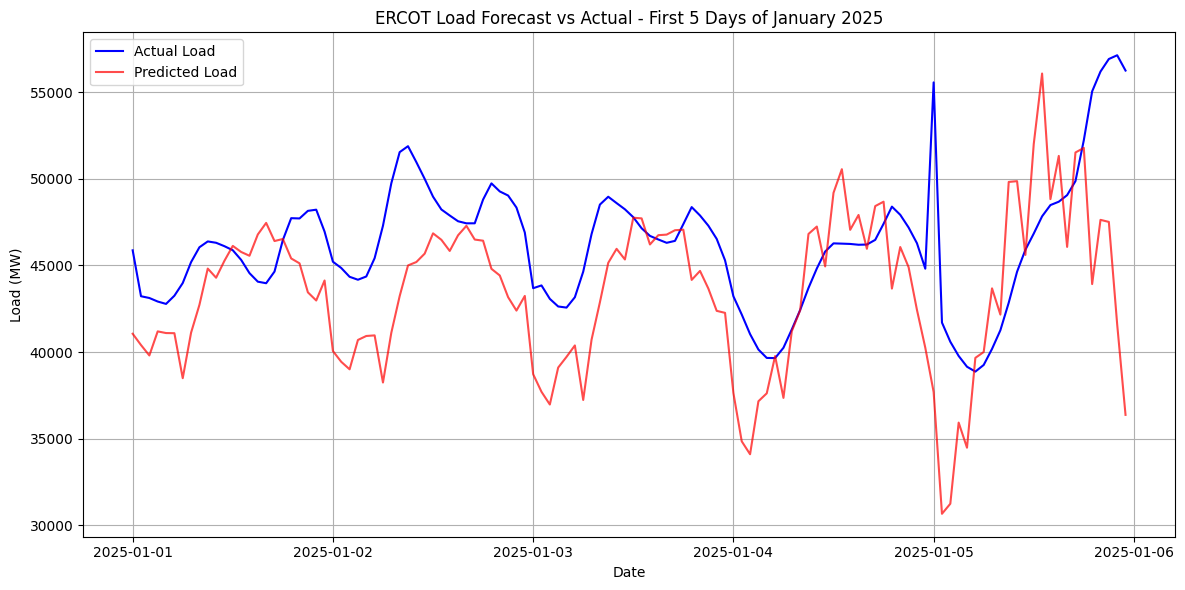

In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define the date range for the first five days of January 2025
start_date = '2025-01-01'
end_date = '2025-01-05 23:00:00'

# Sort the index of df2 to ensure it is monotonic
df2.sort_index(inplace=True)

# Filter the actual and predicted values for the specified date range
actual_values = df2.loc[start_date:end_date, 'ERCOT'].values
predicted_values = forecast_ercot[:len(actual_values)]

# Calculate MSE
mse = mean_squared_error(actual_values, predicted_values)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate MAE
mae = mean_absolute_error(actual_values, predicted_values)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate R^2 value
r2 = r2_score(actual_values, predicted_values)
print(f"R² Score: {r2}")

# Plot actual vs predicted for the evaluation period
plt.figure(figsize=(12,6))
plt.plot(df2.loc[start_date:end_date].index, actual_values, label='Actual Load', color='blue')
plt.plot(df2.loc[start_date:end_date].index, predicted_values, label='Predicted Load', color='red', alpha=0.7)
plt.title('ERCOT Load Forecast vs Actual - First 5 Days of January 2025')
plt.xlabel('Date')
plt.ylabel('Load (MW)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 168, 100)       │        41,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 168, 100)       │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 168, 100)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 168, 100)       │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 168, 100)       │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 168, 100)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 50)             │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 50)             │           200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 24)             │         1,224 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 154,424 (603.22 KB)

 Trainable params: 153,924 (601.27 KB)

 Non-trainable params: 500 (1.95 KB)

Epoch 1/25
171/171 ━━━━━━━━━━━━━━━━━━━━ 26s 144ms/step - loss: 0.8169 - val_loss: 0.2057
Epoch 2/25
171/171 ━━━━━━━━━━━━━━━━━━━━ 24s 139ms/step - loss: 0.2225 - val_loss: 0.1698
Epoch 3/25
171/171 ━━━━━━━━━━━━━━━━━━━━ 24s 142ms/step - loss: 0.1543 - val_loss: 0.1043
Epoch 4/25
171/171 ━━━━━━━━━━━━━━━━━━━━ 24s 140ms/step - loss: 0.1141 - val_loss: 0.0685
Epoch 5/25
171/171 ━━━━━━━━━━━━━━━━━━━━ 24s 138ms/step - loss: 0.0893 - val_loss: 0.0499
Epoch 6/25
171/171 ━━━━━━━━━━━━━━━━━━━━ 24s 141ms/step - loss: 0.0692 - val_loss: 0.0371
Epoch 7/25
171/171 ━━━━━━━━━━━━━━━━━━━━ 24s 143ms/step - loss: 0.0532 - val_loss: 0.0316
Epoch 8/25
171/171 ━━━━━━━━━━━━━━━━━━━━ 24s 141ms/step - loss: 0.0429 - val_loss: 0.0242
Epoch 9/25
171/171 ━━━━━━━━━━━━━━━━━━━━ 24s 141ms/step - loss: 0.0360 - val_loss: 0.0214
Epoch 10/25
171/171 ━━━━━━━━━━━━━━━━━━━━ 24s 142ms/step - loss: 0.0319 - val_loss: 0.0191
Epoch 11/25
171/171 ━━━━━━━━━━━━━━━━━━━━ 24s 143ms/step - loss: 0.0286 - val_loss: 0.0175
Epoch 12/25
171/171

/var/folders/dh/j5bmpt9d6clgh4sxgj75h9zh0000gn/T/ipykernel_36418/1922114756.py:160: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



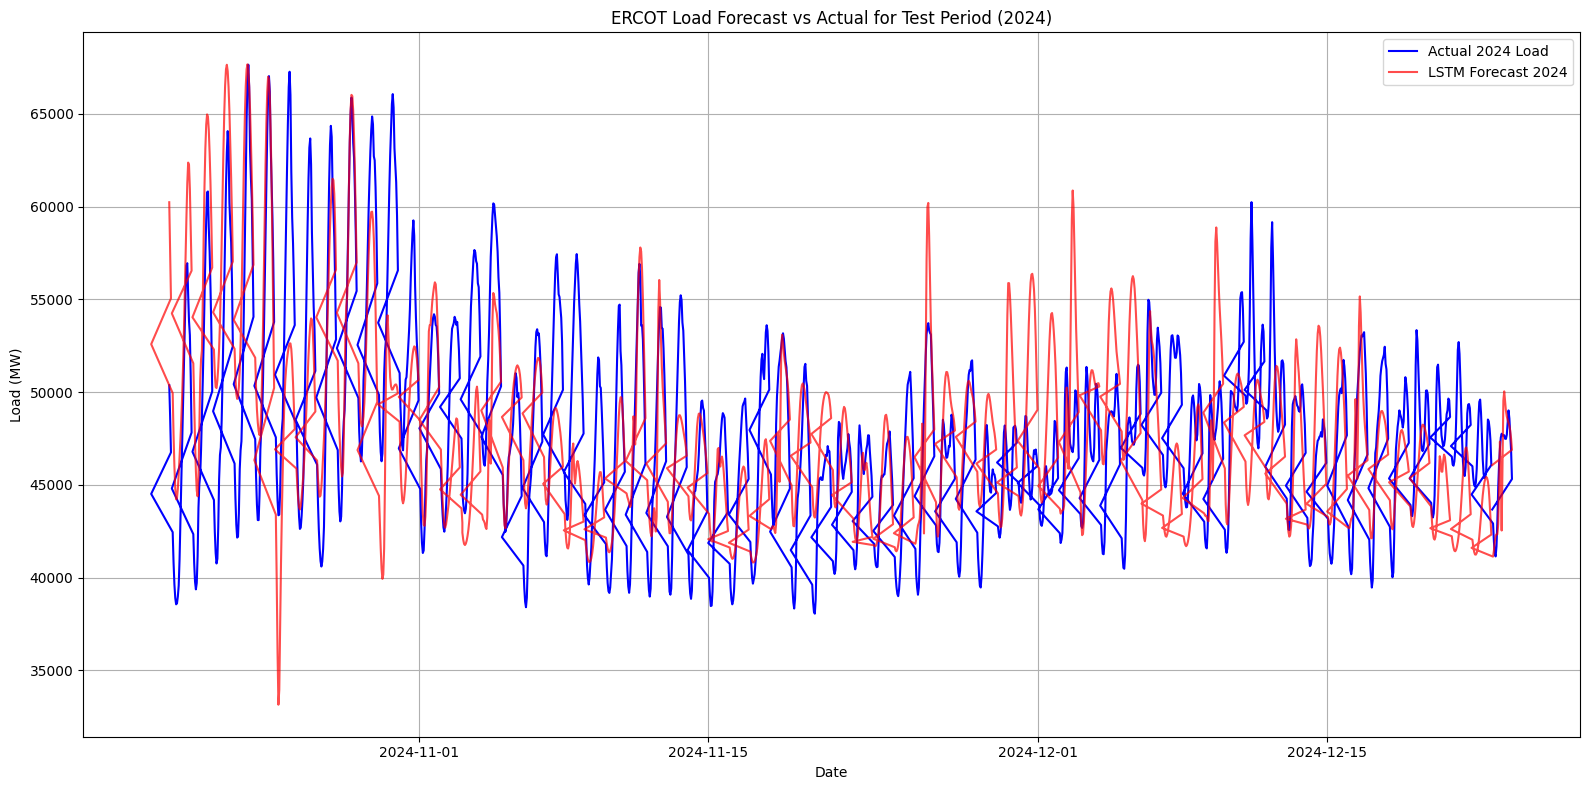

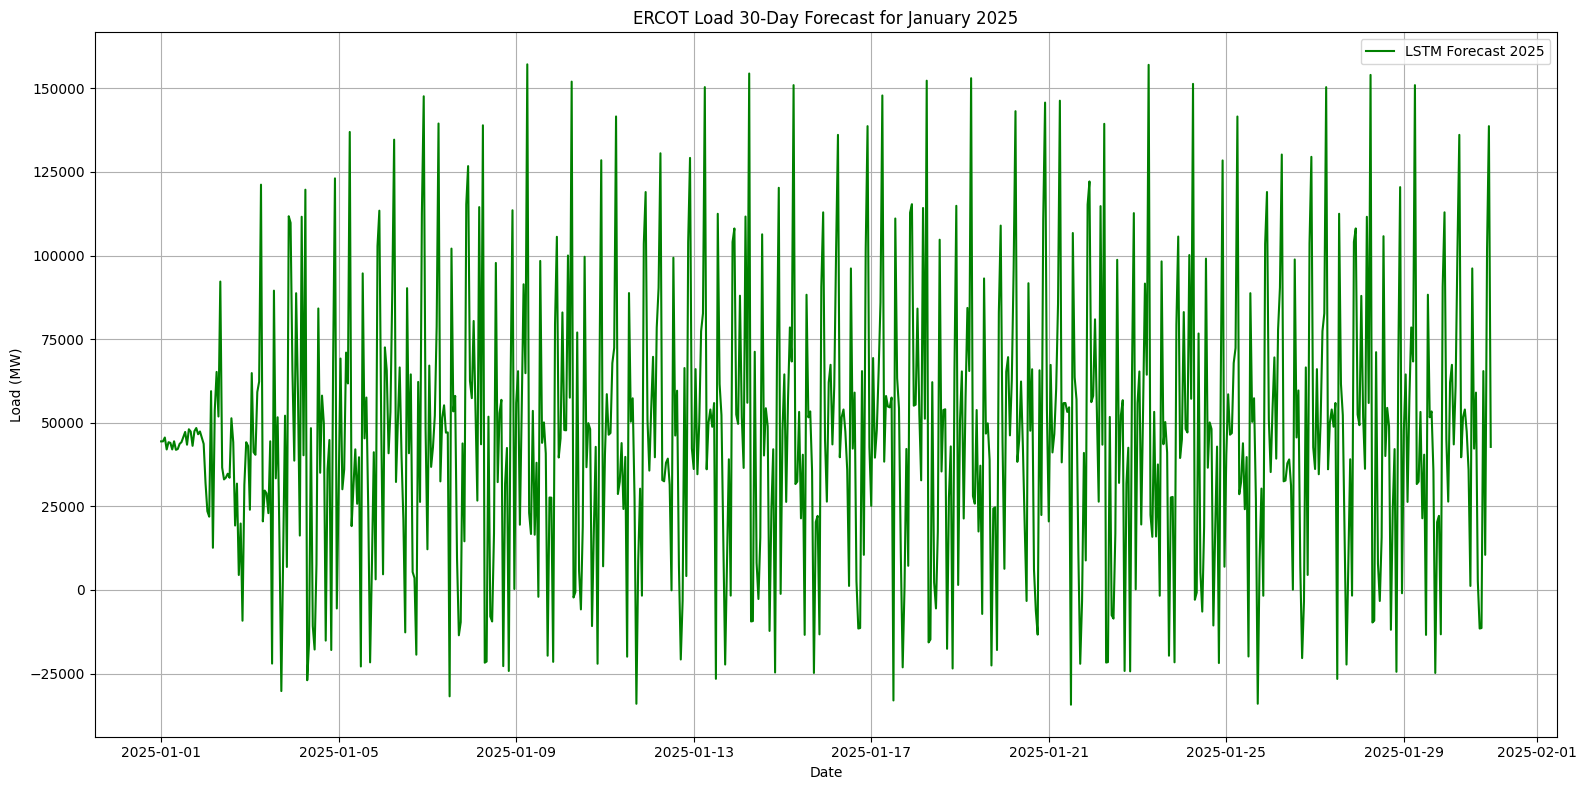

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━

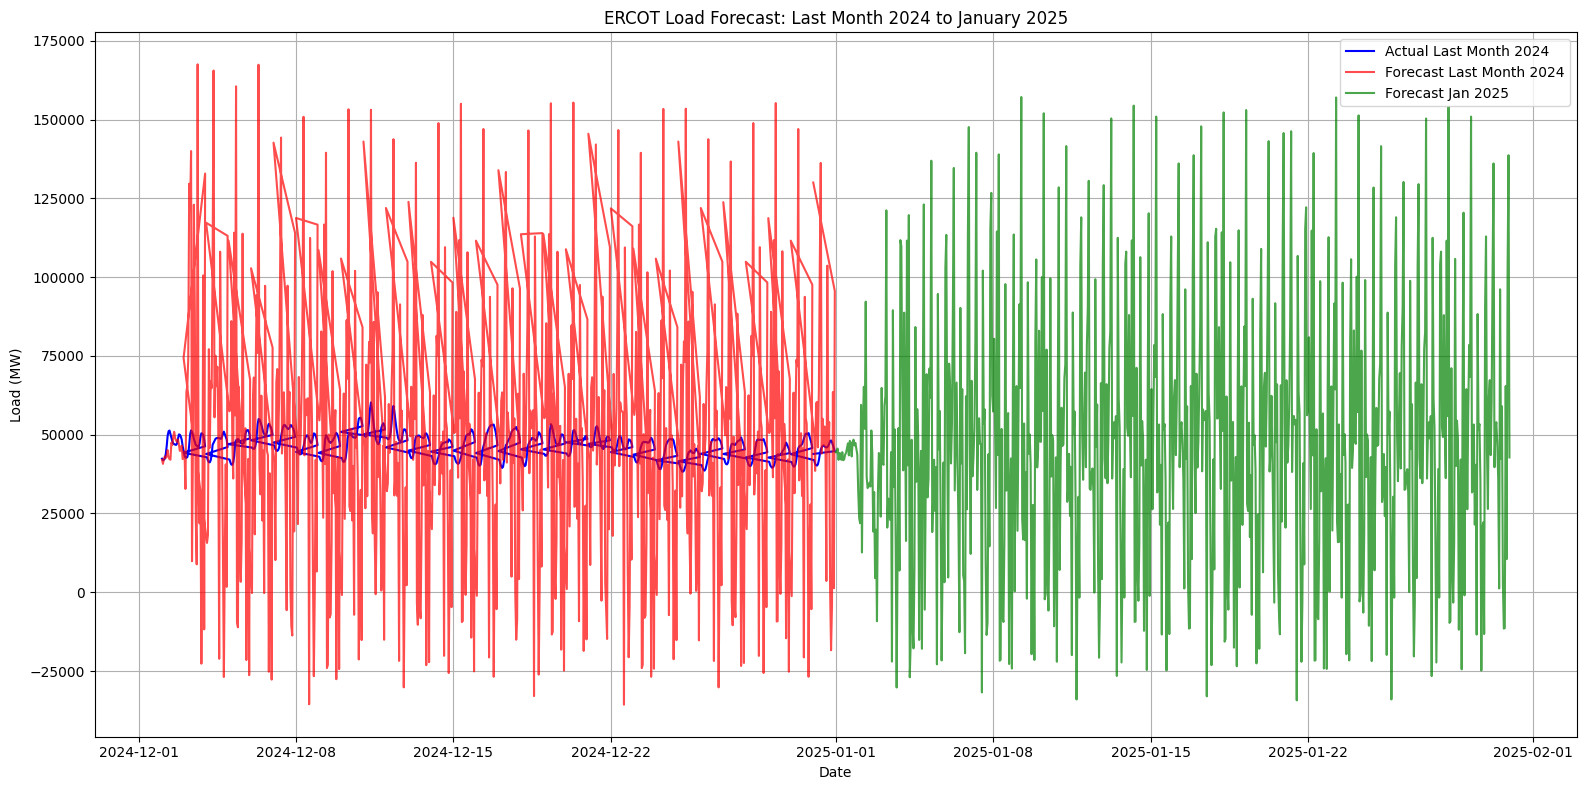

In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import os
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

path = os.getcwd()
# Load and preprocess data
df = pd.read_excel(path + "/Native_Load_2024.xlsx")

# Drop na rows
df.dropna(inplace=True)

# Clean and convert datetime
df['Hour Ending'] = (df['Hour Ending']
                    .str.replace(' 24:00', ' 00:00')
                    .str.replace(' DST', ''))
df['Hour Ending'] = pd.to_datetime(df['Hour Ending'], format='%m/%d/%Y %H:%M')
df.set_index('Hour Ending', inplace=True)
load_series = df['ERCOT'].astype(float)

# Feature engineering
df['hour'] = df.index.hour
df['dayofweek'] = df.index.dayofweek
df['dayofyear'] = df.index.dayofyear

# Split data into training and testing portions (first 80% for training, last 20% for testing)
train_size = int(len(df) * 0.8)
df_train = df.iloc[:train_size]
df_test = df.iloc[train_size:]

# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(df_train[['ERCOT', 'hour', 'dayofweek']])

# Transform all data
scaled_data_train = scaler.transform(df_train[['ERCOT', 'hour', 'dayofweek']])
scaled_data_test = scaler.transform(df_test[['ERCOT', 'hour', 'dayofweek']])
scaled_data_all = scaler.transform(df[['ERCOT', 'hour', 'dayofweek']])

# Create sequences with 168-hour (7-day) lookback and 24-hour forecast
def create_sequences(data, lookback, forecast_horizon):
    X, y = [], []
    for i in range(len(data)-lookback-forecast_horizon):
        X.append(data[i:(i+lookback)])
        y.append(data[(i+lookback):(i+lookback+forecast_horizon), 0])
    return np.array(X), np.array(y)

LOOKBACK = 168  # 7 days of hourly data
FORECAST = 24   # Predict next 24 hours

# Create sequences for training data
X_train, y_train = create_sequences(scaled_data_train, LOOKBACK, FORECAST)

# Split training data for validation
val_size = int(len(X_train) * 0.2)
X_val = X_train[-val_size:]
y_val = y_train[-val_size:]
X_train = X_train[:-val_size]
y_train = y_train[:-val_size]

# Build LSTM model
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(LOOKBACK, X_train.shape[2])))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(LSTM(100, return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(BatchNormalization())
model.add(Dense(FORECAST))
optimizer = Adam(learning_rate=0.0001)

model.compile(optimizer=optimizer, loss='mse')

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model.summary()

# Train model
history = model.fit(X_train, y_train, 
                   epochs=25, 
                   batch_size=32,
                   validation_data=(X_val, y_val),
                   callbacks=[early_stopping],
                   verbose=1)

# Function for recursive multi-step forecasting
def forecast_future(model, last_sequence, future_steps):
    forecasts = []
    current_sequence = last_sequence.copy()
    
    for _ in range(future_steps // FORECAST + 1):
        # Predict next FORECAST hours
        pred = model.predict(current_sequence.reshape(1, LOOKBACK, -1))[0]
        forecasts.extend(pred)
        
        # Update sequence with prediction
        for i in range(min(FORECAST, future_steps - len(forecasts))):
            new_entry = np.zeros((1, X_train.shape[2]))
            new_entry[0,0] = pred[i]  # ERCOT value
            
            # Calculate new hour and day of week
            hours_ahead = i + 1
            current_hour = (current_sequence[-1,1] + hours_ahead) % 24
            current_day = (current_sequence[-1,2] + (hours_ahead / 24)) % 7
            
            new_entry[0,1] = current_hour  # Update hour
            new_entry[0,2] = current_day   # Update dayofweek
            
            current_sequence = np.vstack([current_sequence[1:], new_entry])
    
    return forecasts[:future_steps]

# 1. Predict test data (last 20% of 2024)
# Create sequences for test data
X_test, y_test = create_sequences(scaled_data_test, LOOKBACK, FORECAST)

# Make predictions on test data
test_predictions = []
for i in range(len(X_test)):
    pred = model.predict(X_test[i:i+1])[0]
    test_predictions.extend(pred[:1])  # Take only the first prediction to avoid overlap

# Prepare test predictions for inverse transform
test_pred_array = np.zeros((len(test_predictions), 3))
test_pred_array[:,0] = test_predictions
test_pred_ercot = scaler.inverse_transform(test_pred_array)[:,0]

# Calculate metrics for test predictions
test_actual = df_test['ERCOT'].values[:len(test_pred_ercot)]
mse_test = mean_squared_error(test_actual, test_pred_ercot)
mae_test = mean_absolute_error(test_actual, test_pred_ercot)
r2_test = r2_score(test_actual, test_pred_ercot)

print(f"Test Data Metrics:")
print(f"Mean Squared Error (MSE): {mse_test:.2f}")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"R² Score: {r2_test:.4f}")

# 2. Predict first 30 days of 2025
# Use the last LOOKBACK hours of 2024 data
last_known = scaled_data_all[-LOOKBACK:]
forecast_steps_2025 = 24 * 30  # 30 days
predictions_2025 = forecast_future(model, last_known, forecast_steps_2025)

# Transform 2025 predictions back to original scale
predictions_2025_array = np.zeros((len(predictions_2025), 3))
predictions_2025_array[:,0] = predictions_2025
predictions_2025_ercot = scaler.inverse_transform(predictions_2025_array)[:,0]

# Create date ranges for forecasts
forecast_dates_2025 = pd.date_range(start='2025-01-01',
                                   periods=len(predictions_2025_ercot),
                                   freq='H')

# Plot test results
plt.figure(figsize=(16,8))
plt.plot(df_test.index[:len(test_pred_ercot)], test_actual, label='Actual 2024 Load', color='blue')
plt.plot(df_test.index[:len(test_pred_ercot)], test_pred_ercot, label='LSTM Forecast 2024', color='red', alpha=0.7)
plt.title('ERCOT Load Forecast vs Actual for Test Period (2024)')
plt.xlabel('Date')
plt.ylabel('Load (MW)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 2025 forecast
plt.figure(figsize=(16,8))
plt.plot(forecast_dates_2025, predictions_2025_ercot, label='LSTM Forecast 2025', color='green')
plt.title('ERCOT Load 30-Day Forecast for January 2025')
plt.xlabel('Date')
plt.ylabel('Load (MW)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot both December 2024 and January 2025 to see the transition
# Get December 2024 data (or last month of available data)
last_month_mask = (df.index >= df.index[-30*24])
last_month_data = df[last_month_mask]

# Make predictions for the last month of 2024
last_month_sequence = scaled_data_all[-(LOOKBACK + len(last_month_data)):-len(last_month_data)]
last_month_pred = forecast_future(model, last_month_sequence, len(last_month_data))
last_month_pred_array = np.zeros((len(last_month_pred), 3))
last_month_pred_array[:,0] = last_month_pred
last_month_pred_ercot = scaler.inverse_transform(last_month_pred_array)[:,0]

plt.figure(figsize=(16,8))
plt.plot(last_month_data.index, last_month_data['ERCOT'], label='Actual Last Month 2024', color='blue')
plt.plot(last_month_data.index, last_month_pred_ercot, label='Forecast Last Month 2024', color='red', alpha=0.7)
plt.plot(forecast_dates_2025, predictions_2025_ercot, label='Forecast Jan 2025', color='green', alpha=0.7)
plt.title('ERCOT Load Forecast: Last Month 2024 to January 2025')
plt.xlabel('Date')
plt.ylabel('Load (MW)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


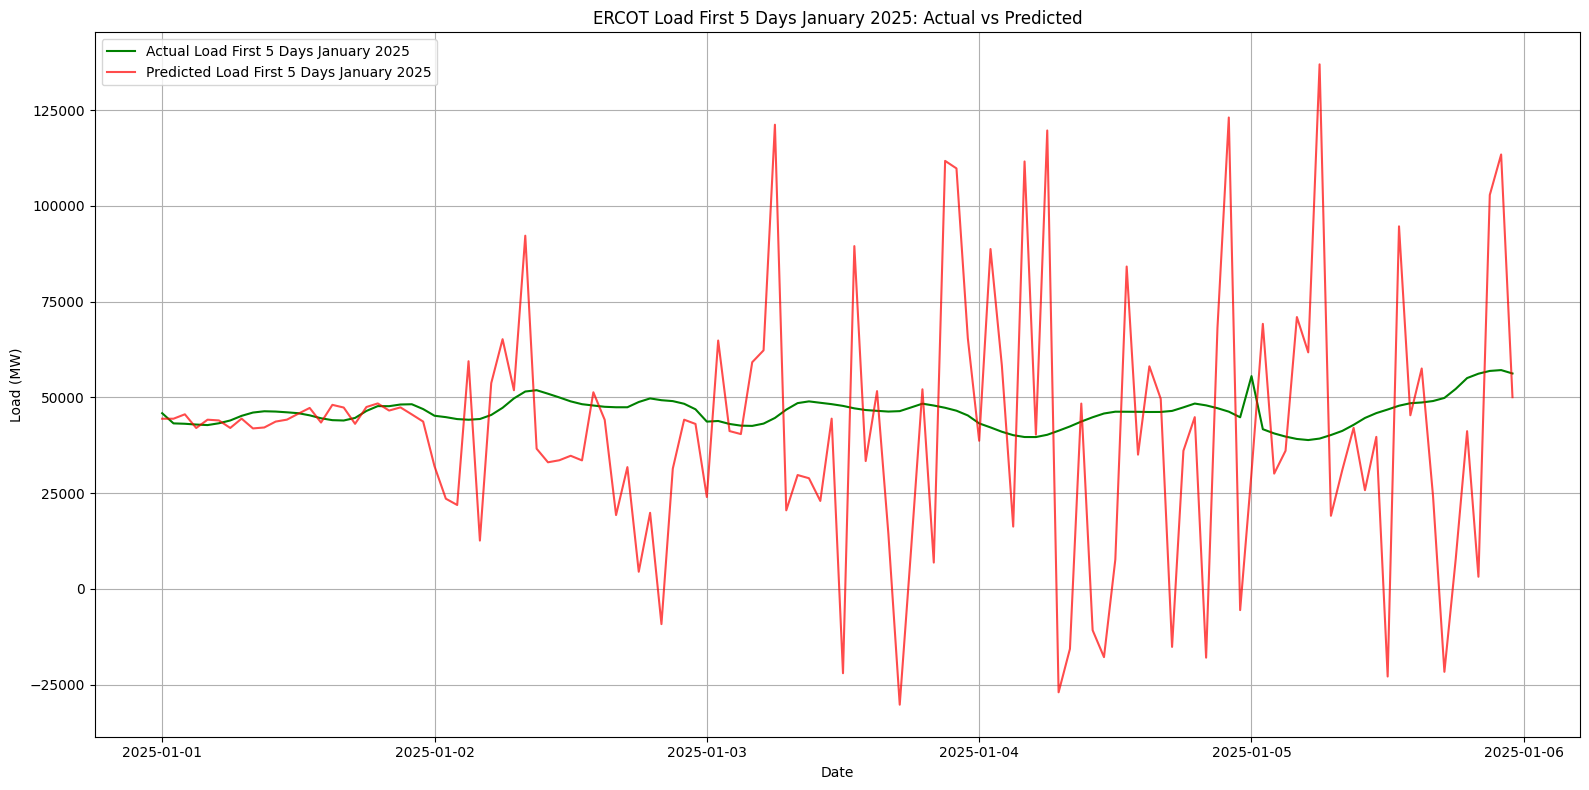

In [16]:
# Filter the actual and forecast data for the first 5 days of January 2025
actual_first_5_days = df2['ERCOT']['2025-01-01':'2025-01-05']
forecast_first_5_days = predictions_2025_ercot[:len(actual_first_5_days)]

# Create a date range for the forecast data
forecast_dates_first_5_days = forecast_dates_2025[:len(actual_first_5_days)]

# Plot results
plt.figure(figsize=(16,8))
plt.plot(actual_first_5_days.index, actual_first_5_days, label='Actual Load First 5 Days January 2025', color='green')
plt.plot(forecast_dates_first_5_days, forecast_first_5_days, label='Predicted Load First 5 Days January 2025', color='red', alpha=0.7)
plt.title('ERCOT Load First 5 Days January 2025: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Load (MW)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()